In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

#### Reading the data for high performance models

In [2]:
high_perf_df = pd.read_csv("data_for_high_performance_models.csv")
high_perf_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7,churn
0,0.0,0.0,0.0,1069.180,1349.850,1519.213488,57.84,54.68,52.29,453.43,...,-1.0,-1.0,802.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1
1,0.0,0.0,0.0,378.721,492.223,137.362000,413.69,351.03,35.08,94.66,...,1.0,1.0,315.0,21.03,910.65,122.16,437.0,603.0,520.0,0
2,0.0,0.0,0.0,492.846,205.671,593.260000,501.76,108.39,534.24,413.31,...,-1.0,1.0,2607.0,0.00,0.00,0.00,507.0,253.0,380.0,0
3,0.0,0.0,0.0,430.975,299.869,187.894000,50.51,74.01,70.61,296.29,...,-1.0,-1.0,511.0,0.00,2.45,21.89,570.0,348.0,459.0,0
4,0.0,0.0,0.0,690.008,18.980,25.499000,1185.91,9.28,7.79,61.64,...,-1.0,-1.0,667.0,0.00,0.00,0.00,816.0,0.0,408.0,0


In [3]:
high_perf_df.shape

(30019, 158)

##### Storing the target varible in the target_var

In [4]:
target_var = high_perf_df['churn']

In [5]:
high_perf_df.drop('churn', axis = 1, inplace = True)
high_perf_df.shape

(30019, 157)

In [6]:
from sklearn.preprocessing import StandardScaler

#### Scaling before performing the PCA

In [7]:
num_cols = high_perf_df.select_dtypes(include = ['int64', 'float64']).columns

scaler = StandardScaler()
high_perf_df[num_cols] = scaler.fit_transform(high_perf_df[num_cols])
high_perf_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7
0,0.0,0.0,0.0,1.636538,2.510202,2.917916,-0.632765,-0.638199,-0.582044,0.183719,...,-0.769198,-0.782245,-0.778856,-0.474119,-0.182020,-0.345100,-0.325309,2.459186,0.303607,1.619414
1,0.0,0.0,0.0,-0.621115,-0.254252,-1.102039,0.447605,0.226780,-0.636276,-0.848816,...,-0.769198,1.340344,1.379308,-0.990277,-0.336839,3.261082,0.130323,-0.647940,-0.188103,-0.502097
2,0.0,0.0,0.0,-0.247950,-1.177916,0.224218,0.714988,-0.481432,0.936688,0.068254,...,-0.769198,-0.782245,1.379308,1.438951,-0.425530,-0.423514,-0.407870,-0.457652,-1.108415,-0.948731
3,0.0,0.0,0.0,-0.450255,-0.874281,-0.955036,-0.655019,-0.581779,-0.524313,-0.268528,...,-0.769198,-0.782245,-0.778856,-0.782542,-0.425530,-0.413601,-0.311431,-0.286393,-0.858616,-0.696702
4,0.0,0.0,0.0,0.396727,-1.779691,-1.427460,2.792086,-0.770712,-0.722273,-0.943847,...,-0.769198,-0.782245,-0.778856,-0.617202,-0.425530,-0.423514,-0.407870,0.382332,-1.773670,-0.859404


In [8]:
X_train = high_perf_df

In [9]:
y = target_var

In [10]:
y.value_counts()[1]

2590

## Class Imbalance handling using SMOTE 

In [11]:
from imblearn.over_sampling import SMOTE

print("Dimenstions of churn data before SMOTE")
print("Before OverSampling, counts of label '1': {}".format(y.value_counts()[1]))
print("Before OverSampling, counts of label '0': {}".format(y.value_counts()[0]))
sm = SMOTE(random_state=2)
X_train_res, y_res = sm.fit_sample(X_train, y.ravel())
print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Dimenstions of churn data before SMOTE
Before OverSampling, counts of label '1': 2590
Before OverSampling, counts of label '0': 27429
After OverSampling, counts of label '1': 27429
After OverSampling, counts of label '0': 27429


#### y is stored in y_res & X in X_train_res

In [12]:
high_perf_df = X_train_res

### PCA

In [13]:
from sklearn.decomposition import PCA

##### PCA for variables explaining 90% variance

In [14]:
pca = PCA(0.90)
pca_data = pca.fit_transform(high_perf_df)
pca_data.shape

(54858, 51)

In [15]:
# Calculating the cumulative scores of all features
var_cumu = np.cumsum(pca.explained_variance_ratio_)

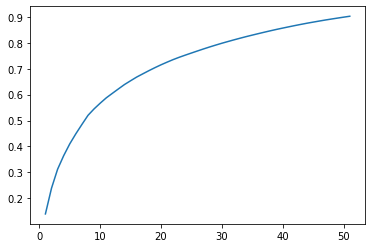

In [16]:
plt.plot(range(1, len(var_cumu)+1), var_cumu)

#### PCA for variables explaining 95% variance

In [17]:
pca1 = PCA(0.95)
pca_data1 = pca1.fit_transform(high_perf_df)
pca_data1.shape

(54858, 69)

In [18]:
y_res.shape

(54858,)

#### Converting the 90% explaining variables into a dataframe named df_pca

In [19]:
df_pca = pd.DataFrame(pca_data)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,6.100124,6.940462,-5.042636,5.570421,-0.415971,3.992336,3.533481,3.527090,2.756972,-2.835635,...,-1.053495,1.986230,0.141430,-0.845111,-1.572229,-1.591986,-1.886321,-0.435356,2.303196,1.152844
1,0.779068,-2.939521,1.333554,-2.846521,-1.393756,-0.315421,-1.386249,-0.474549,0.249651,-0.066193,...,0.428911,0.671149,-0.410348,0.132940,-0.100489,-0.678914,-0.307184,1.581666,0.702894,-1.493484
2,1.385466,3.417318,-1.399256,1.038634,-2.511640,7.418871,3.312090,7.673043,1.857023,-2.532117,...,-0.851799,-2.071557,-0.760559,0.282627,-1.804087,-0.202911,-1.209008,-1.311449,-1.334448,-0.035679
3,-0.842204,-0.244071,-3.673945,0.177725,-0.878501,1.003283,1.665118,1.951179,-0.646478,0.518702,...,0.142733,0.842493,-0.468020,-0.107110,-0.313202,-0.364883,-0.107818,-0.191168,-0.163325,-0.540525
4,-5.029901,-2.681081,-0.693899,-0.611770,2.240781,-1.313320,-1.158906,2.034719,-0.505274,-1.332094,...,-0.295636,0.189776,-0.344005,-0.274224,-0.038747,0.070401,0.117535,0.157665,0.379329,0.097534


## Random Forest Model ( high performace model 1 )

#### Creating a copy of dataframe for the random forest model named as df_rf

In [20]:
df_rf = df_pca.copy()

In [21]:
print(df_rf.shape)

(54858, 51)


##### Train Test Split

In [22]:
X_rf = df_rf
y_rf = y_res
# y_rf = np.asarray(y_rf, dtype="|S6")
print(X_rf.shape)
print(y_rf.shape)

(54858, 51)
(54858,)


In [23]:
from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, train_size=0.7, random_state=100)
print(X_train_rf.shape)
print(y_train_rf.shape)
print(X_test_rf.shape)
print(y_test_rf.shape)

(38400, 51)
(38400,)
(16458, 51)
(16458,)


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(random_state = 100, n_jobs = -1)

In [26]:
# Creating a parameters grid for GridSearchCV
params = {
    'max_depth': [2, 4, 8, 10, 12],
    'min_samples_leaf': range(100, 400, 200),
    'max_features': [2, 3, 6],
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100, 150, 200, 30]
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [28]:
%%time
grid_search.fit(X_train_rf,y_train_rf)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.7min finished


Wall time: 1min 48s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 8, 10, 12],
                                        'max_features': [2, 3, 6],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 100),
                                        'n_estimators': [100, 150, 200, 30]},
                   scoring='recall', verbose=1)

In [29]:
rf_best = grid_search.best_estimator_

In [30]:
rf_best

RandomForestClassifier(max_depth=8, max_features=2, min_samples_leaf=100,
                       min_samples_split=300, n_estimators=150, n_jobs=-1,
                       random_state=100)

#### Results for the high performance model 1 ( Random Forest )

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Train Accuracy :", accuracy_score(y_train_rf, rf_best.predict(X_train_rf)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train_rf, rf_best.predict(X_train_rf)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test_rf, rf_best.predict(X_test_rf)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test_rf, rf_best.predict(X_test_rf)))

Train Accuracy : 0.84296875
Train Confusion Matrix:
[[16309  2857]
 [ 3173 16061]]
--------------------------------------------------
Test Accuracy : 0.8388625592417062
Test Confusion Matrix:
[[7010 1253]
 [1399 6796]]


# Results for Random Forest

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test_rf, rf_best.predict(X_test_rf)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      8263
           1       0.84      0.83      0.84      8195

    accuracy                           0.84     16458
   macro avg       0.84      0.84      0.84     16458
weighted avg       0.84      0.84      0.84     16458



- We attained a recall of 84% i.e we are able to predict 84 out of 100 persons who are going to predict

In [33]:
recall_rf = 0.83
accuracy_rf = 0.84

## Decision Treee Model ( high performance model 2)

#### Creating a copy of dataframe for the random forest named as df_dt

In [34]:
df_dt = df_pca.copy()

In [35]:
print(df_dt.shape)

(54858, 51)


#### Train Test Split

In [36]:
X_dt = df_dt
y_dt = y_res
# y_dt = np.asarray(y_dt, dtype="|S6")
print(X_dt.shape)
print(y_dt.shape)

(54858, 51)
(54858,)


In [37]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, train_size = 0.7, random_state = 100)
print(X_train_dt.shape)
print(y_train_dt.shape)
print(X_test_dt.shape)
print(y_test_dt.shape)

(38400, 51)
(38400,)
(16458, 51)
(16458,)


In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 100)

In [39]:
# Creating a parameters grid for GridSearchCV
params = {
    'max_depth': [2, 4, 8, 10, 12],
    'min_samples_leaf': range(100, 400, 200),
    'max_features': [2, 3, 6],
    'min_samples_split': range(200, 500, 100),
    'criterion': ["gini", "entropy"]
}

In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator=dt, param_distributions=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "recall")

In [41]:
%%time
grid_search.fit(X_train_dt, y_train_dt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


Wall time: 4.55 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 8, 10, 12],
                                        'max_features': [2, 3, 6],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 100)},
                   scoring='recall', verbose=1)

In [42]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=3,
                       min_samples_leaf=300, min_samples_split=400,
                       random_state=100)

In [43]:
dt_best = grid_search.best_estimator_

In [44]:
print(classification_report(y_test_dt, dt_best.predict(X_test_dt)))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      8263
           1       0.72      0.72      0.72      8195

    accuracy                           0.72     16458
   macro avg       0.72      0.72      0.72     16458
weighted avg       0.72      0.72      0.72     16458



- We attained a good recall of 88% i.e We are able to predict 88 persons out of 100 who are actually going to predict
- The accuracy score seems a little low, but the business solution needs a recall to fulfil our problem

In [45]:
recall_dt = 0.87
accuracy_dt = 0.83

## Logistic Regression Model ( high performance model 3 )

In [46]:
df_log = df_pca.copy()

In [47]:
df_log.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,6.100124,6.940462,-5.042636,5.570421,-0.415971,3.992336,3.533481,3.527090,2.756972,-2.835635,...,-1.053495,1.986230,0.141430,-0.845111,-1.572229,-1.591986,-1.886321,-0.435356,2.303196,1.152844
1,0.779068,-2.939521,1.333554,-2.846521,-1.393756,-0.315421,-1.386249,-0.474549,0.249651,-0.066193,...,0.428911,0.671149,-0.410348,0.132940,-0.100489,-0.678914,-0.307184,1.581666,0.702894,-1.493484
2,1.385466,3.417318,-1.399256,1.038634,-2.511640,7.418871,3.312090,7.673043,1.857023,-2.532117,...,-0.851799,-2.071557,-0.760559,0.282627,-1.804087,-0.202911,-1.209008,-1.311449,-1.334448,-0.035679
3,-0.842204,-0.244071,-3.673945,0.177725,-0.878501,1.003283,1.665118,1.951179,-0.646478,0.518702,...,0.142733,0.842493,-0.468020,-0.107110,-0.313202,-0.364883,-0.107818,-0.191168,-0.163325,-0.540525
4,-5.029901,-2.681081,-0.693899,-0.611770,2.240781,-1.313320,-1.158906,2.034719,-0.505274,-1.332094,...,-0.295636,0.189776,-0.344005,-0.274224,-0.038747,0.070401,0.117535,0.157665,0.379329,0.097534


### Train Test Split

In [48]:
df_log['churn'] = y_res
df_log.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,churn
0,6.100124,6.940462,-5.042636,5.570421,-0.415971,3.992336,3.533481,3.527090,2.756972,-2.835635,...,1.986230,0.141430,-0.845111,-1.572229,-1.591986,-1.886321,-0.435356,2.303196,1.152844,1
1,0.779068,-2.939521,1.333554,-2.846521,-1.393756,-0.315421,-1.386249,-0.474549,0.249651,-0.066193,...,0.671149,-0.410348,0.132940,-0.100489,-0.678914,-0.307184,1.581666,0.702894,-1.493484,0
2,1.385466,3.417318,-1.399256,1.038634,-2.511640,7.418871,3.312090,7.673043,1.857023,-2.532117,...,-2.071557,-0.760559,0.282627,-1.804087,-0.202911,-1.209008,-1.311449,-1.334448,-0.035679,0
3,-0.842204,-0.244071,-3.673945,0.177725,-0.878501,1.003283,1.665118,1.951179,-0.646478,0.518702,...,0.842493,-0.468020,-0.107110,-0.313202,-0.364883,-0.107818,-0.191168,-0.163325,-0.540525,0
4,-5.029901,-2.681081,-0.693899,-0.611770,2.240781,-1.313320,-1.158906,2.034719,-0.505274,-1.332094,...,0.189776,-0.344005,-0.274224,-0.038747,0.070401,0.117535,0.157665,0.379329,0.097534,0


In [49]:
X_log = df_log.drop('churn', axis = 1)
y_log = df_log['churn']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, train_size=0.7, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38400, 51)
(38400,)
(16458, 51)
(16458,)


In [51]:
# Checking he type of variable of y_train
print(type(y_train))

<class 'pandas.core.series.Series'>


In [52]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [53]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38348
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14582.
Date:                Tue, 01 Sep 2020   Deviance:                       29163.
Time:                        10:31:20   Pearson chi2:                 7.42e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2312      0.017    -13.876      0.000      -0.264      -0.199
0             -0.3965      0.005    -79.479      0.000      -0.406      -0.387
1             -0.2113      0.005    -43.534      0.000      -0.221      -0.202
2              0.1285      0.005     23.363      0.000       0.118       0.139
3              0.1525      0.006     25.425      0.000       0.141       0.164
4              0.4534      0.007     62.993      0.000       0.439       0.467
5              0.0546      0.007      7.922      0.000       0.041       0.068
6             -0.0201      0.007     -2.776      0.005      -0.034      -0.006
7             -0.0014      0.007     -0.195      0.846      -0.016       0.013
8              0.1410      0.009     15.664      0.000       0.123       0.159
9              0.5575      0.011     52.779      0.000       0.537       0.578
10            -0.3932      0.011    -36.225      0.000      -0.414      -0.372
11            -0.0772      0.012     -6.610      0.000      -0.100      -0.054
12            -0.1455      0.011    -12.701      0.000      -0.168      -0.123
13            -0.0911      0.011     -8.173      0.000      -0.113      -0.069
14            -0.0131      0.012     -1.063      0.288      -0.037       0.011
15             0.0002      0.012      0.017      0.986      -0.024       0.025
16            -0.0145      0.014     -1.059      0.290      -0.041       0.012
17             0.0835      0.013      6.191      0.000       0.057       0.110
18             0.0452      0.013      3.422      0.001       0.019       0.071
19            -0.1773      0.013    -13.134      0.000      -0.204      -0.151
20            -0.0516      0.014     -3.612      0.000      -0.080      -0.024
21             0.1259      0.016      7.739      0.000       0.094       0.158
22             0.1158      0.015      7.556      0.000       0.086       0.146
23             0.1789      0.016     11.095      0.000       0.147       0.211
24            -0.1378      0.016     -8.591      0.000      -0.169      -0.106
25             0.1136      0.017      6.792      0.000       0.081       0.146
26            -0.0380      0.016     -2.387      0.017      -0.069      -0.007
27            -0.0612      0.017     -3.691      0.000      -0.094      -0.029
28            -0.0488      0.020     -2.470      0.014      -0.088      -0.010
29             0.1160      0.018      6.416      0.000       0.081       0.151
30             0.0844      0.018      4.620      0.000       0.049       0.120
31            -0.0107      0.017     -0.619      0.536      -0.045       0.023
32            -0.0692      0.019     -3.601      0.000      -0.107      -0.032
33            -0.0308      0.018     -1.710      0.087      -0.066       0.005
34            -0.0687      0.019     -3.554      0.000      -0.107      -0.031
35

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
log1 = LogisticRegression()
rfe1 = RFE(log1, 40)
rfe1 = rfe1.fit(X_train, y_train)

In [56]:
col = X_train.columns[rfe1.support_]
print(col)

Index([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 17, 19, 20, 21, 22, 23,
       24, 25, 27, 28, 29, 30, 32, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50],
      dtype='object')


In [57]:
X_train_sm = sm.add_constant(X_train[col])
log2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model2 = log2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38359
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14597.
Date:                Tue, 01 Sep 2020   Deviance:                       29194.
Time:                        10:31:24   Pearson chi2:                 7.23e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2344      0.016    -14.251      0.000      -0.267      -0.202
0             -0.3962      0.005    -80.430      0.000      -0.406      -0.387
1             -0.2129      0.005    -44.041      0.000      -0.222      -0.203
2              0.1281      0.005     23.538      0.000       0.117       0.139
3              0.1535      0.006     25.731      0.000       0.142       0.165
4              0.4530      0.007     63.041      0.000       0.439       0.467
5              0.0545      0.007      7.969      0.000       0.041       0.068
8              0.1406      0.009     15.711      0.000       0.123       0.158
9              0.5567      0.011     52.909      0.000       0.536       0.577
10            -0.3955      0.011    -36.835      0.000      -0.417      -0.374
11            -0.0735      0.012     -6.372      0.000      -0.096      -0.051
12            -0.1417      0.011    -12.474      0.000      -0.164      -0.119
13            -0.0919      0.011     -8.271      0.000      -0.114      -0.070
17             0.0808      0.013      6.025      0.000       0.055       0.107
19            -0.1793      0.013    -13.309      0.000      -0.206      -0.153
20            -0.0537      0.014     -3.759      0.000      -0.082      -0.026
21             0.1300      0.016      8.056      0.000       0.098       0.162
22             0.1156      0.015      7.591      0.000       0.086       0.145
23             0.1788      0.016     11.139      0.000       0.147       0.210
24            -0.1387      0.016     -8.676      0.000      -0.170      -0.107
25             0.1105      0.017      6.653      0.000       0.078       0.143
27            -0.0613      0.017     -3.698      0.000      -0.094      -0.029
28            -0.0484      0.019     -2.494      0.013      -0.086      -0.010
29             0.1172      0.018      6.514      0.000       0.082       0.153
30             0.0870      0.018      4.819      0.000       0.052       0.122
32            -0.0738      0.019     -3.875      0.000      -0.111      -0.036
34            -0.0705      0.019     -3.655      0.000      -0.108      -0.033
35             0.0932      0.018      5.090      0.000       0.057       0.129
36             0.1098      0.018      5.986      0.000       0.074       0.146
37             0.0620      0.020      3.148      0.002       0.023       0.101
39            -0.1006      0.020     -4.940      0.000      -0.141      -0.061
41            -0.2169      0.021    -10.103      0.000      -0.259      -0.175
42             0.2542      0.020     12.411      0.000       0.214       0.294
43            -0.1454      0.022     -6.651      0.000      -0.188      -0.103
44             0.0567      0.022      2.540      0.011       0.013       0.100
45            -0.5165      0.026    -19.881      0.000      -0.567      -0.466
46

In [58]:
# Getting the predicted probabilities
y_train_pred = model2.predict(X_train_sm)
y_train_pred[:7]

29172    0.008065
9013     0.177540
8741     0.032071
30680    0.936593
43716    0.694321
17901    0.532962
52619    0.604667
dtype: float64

In [59]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00806485, 0.1775397 , 0.03207055, 0.93659278, 0.69432059,
       0.53296153, 0.6046665 , 0.33509615, 0.06563537, 0.9302197 ])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [60]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,ID
0,0,0.008065,29172
1,0,0.177540,9013
2,0,0.032071,8741
3,1,0.936593,30680
4,1,0.694321,43716


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [61]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted
0,0,0.008065,29172,0
1,0,0.177540,9013,0
2,0,0.032071,8741,0
3,1,0.936593,30680,1
4,1,0.694321,43716,1


In [62]:
from sklearn import metrics

In [63]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15952  3214]
 [ 2853 16381]]


In [64]:
# overall accuracy.
accuracy_log = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print("Accuracy: {}".format(accuracy_log))

Accuracy: 0.8420052083333334


In [65]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [66]:
# sensitivity
TP / float(TP+FN)

0.8516689196215036

In [67]:
# specificity
TN / float(TN+FP)

0.8323072106855891

### ROC Curve Plotting

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

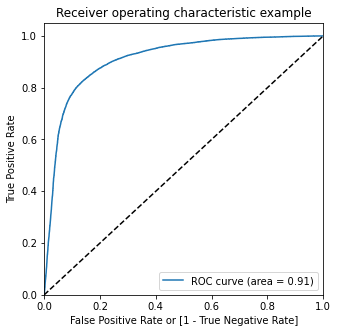

In [70]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding the Optimal cutoff point for the churn value

In [71]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.008065,29172,0,1,0,0,0,0,0,0,0,0,0
1,0,0.177540,9013,0,1,1,0,0,0,0,0,0,0,0
2,0,0.032071,8741,0,1,0,0,0,0,0,0,0,0,0
3,1,0.936593,30680,1,1,1,1,1,1,1,1,1,1,1
4,1,0.694321,43716,1,1,1,1,1,1,1,1,0,0,0


In [72]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500885  1.000000  0.000000
0.1   0.1  0.712083  0.977228  0.445998
0.2   0.2  0.775625  0.952480  0.598143
0.3   0.3  0.812031  0.925237  0.698424
0.4   0.4  0.832396  0.892066  0.772514
0.5   0.5  0.842005  0.851669  0.832307
0.6   0.6  0.842943  0.808412  0.877596
0.7   0.7  0.832656  0.752730  0.912867
0.8   0.8  0.796823  0.651191  0.942972
0.9   0.9  0.653151  0.333316  0.974121


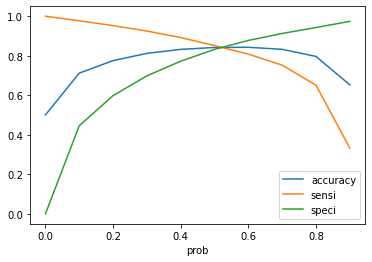

In [73]:
# Plottign the tradeoff graph between all the metrics
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Seems like our threshold of 0.5 is fine for sensitivity and specificity

### Precision & Recall calculations

In [74]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[15952,  3214],
       [ 2853, 16381]], dtype=int64)

#### Formula for Precision: TP/TP+FP

In [75]:
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
print("Precision: {}".format(precision))

Precision: 0.8359785659607043


#### Formula for recall: TP/TP+FN

In [76]:
recall_log = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print("Recall: {}".format(recall_log))

Recall: 0.8516689196215036


#### F score calculation

- (2 × precision × recall)/(precision + recall)

In [77]:
f_score = (2*precision*recall_log)/(precision+recall_log)
print("F Score: {}".format(f_score))

F Score: 0.8437508048108373


#### Precision & Recall tradeoff graph plottin

In [78]:
from sklearn.metrics import precision_recall_curve

In [79]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

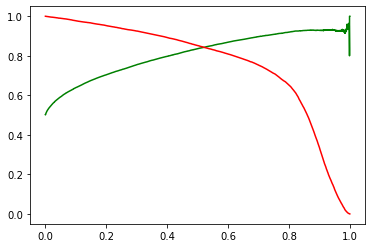

In [80]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- Looks like all our metrics i.e sensitivity, specificity, precision & recall performs good at 0.5 threshold

### Results of Logistic Regression Model ( high performance Model 3 )

#### Accuracy and Recall printed below

In [81]:
print("Accuracy: {}".format(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))

Accuracy: 0.8420052083333334


In [82]:
print("Recall: {}".format(confusion[1,1]/(confusion[0,1]+confusion[1,1])))

Recall: 0.8359785659607043


## Overall scores of all 3 high performance models

In [83]:
performance = pd.DataFrame(columns = ['Model', 'Accuracy', 'Recall'])
performance.loc[0] = ['Logistic Regression', accuracy_log, recall_log]
performance.loc[1] = ['Decision Tree', accuracy_dt, recall_dt]
performance.loc[2] = ['Random Forest', accuracy_rf, recall_rf]
performance.index+=1
performance.Recall=performance.Recall.round(4)*100
performance.Accuracy=performance.Accuracy.round(4)*100

In [84]:
performance

,Model,Accuracy,Recall
1,Logistic Regression,84.2,85.17
2,Decision Tree,83.0,87.00
3,Random Forest,84.0,83.00


## Logistic Regression Model ( Interpretable Model )

In [85]:
# creating a copy of high_perf_df dataframe prepare the logistic regression model
df_logistic = X_train_res.copy()

In [86]:
df_logistic.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7
0,0.0,0.0,0.0,1.636538,2.510202,2.917916,-0.632765,-0.638199,-0.582044,0.183719,...,-0.769198,-0.782245,-0.778856,-0.474119,-0.182020,-0.345100,-0.325309,2.459186,0.303607,1.619414
1,0.0,0.0,0.0,-0.621115,-0.254252,-1.102039,0.447605,0.226780,-0.636276,-0.848816,...,-0.769198,1.340344,1.379308,-0.990277,-0.336839,3.261082,0.130323,-0.647940,-0.188103,-0.502097
2,0.0,0.0,0.0,-0.247950,-1.177916,0.224218,0.714988,-0.481432,0.936688,0.068254,...,-0.769198,-0.782245,1.379308,1.438951,-0.425530,-0.423514,-0.407870,-0.457652,-1.108415,-0.948731
3,0.0,0.0,0.0,-0.450255,-0.874281,-0.955036,-0.655019,-0.581779,-0.524313,-0.268528,...,-0.769198,-0.782245,-0.778856,-0.782542,-0.425530,-0.413601,-0.311431,-0.286393,-0.858616,-0.696702
4,0.0,0.0,0.0,0.396727,-1.779691,-1.427460,2.792086,-0.770712,-0.722273,-0.943847,...,-0.769198,-0.782245,-0.778856,-0.617202,-0.425530,-0.423514,-0.407870,0.382332,-1.773670,-0.859404


### Train Test Split

In [87]:
# df_logistic['churn'] = y_res
# df_log.head()

In [88]:
X_logistic = df_logistic
y_logistic = y_res

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, train_size=0.7, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38400, 157)
(38400,)
(16458, 157)
(16458,)


In [90]:
# Checking he type of variable of y_train
print(type(y_train))

<class 'numpy.ndarray'>


In [91]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [92]:
import warnings
warnings.filterwarnings("ignore")

In [132]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [93]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38251
Model Family:                Binomial   Df Model:                          148
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13412.
Date:                Tue, 01 Sep 2020   Deviance:                       26824.
Time:                        10:43:24   Pearson chi2:                 1.57e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.0125      0.029    -68.766      0.000      -2.070      -1.955
loc_og_t2o_mou          3.656e-14   8.15e-15      4.488      0.000    2.06e-14    5.25e-14
std_og_t2o_mou          3.713e-13   9.94e-14      3.733      0.000    1.76e-13    5.66e-13
loc_ic_t2o_mou         -1.705e-13   3.29e-14     -5.175      0.000   -2.35e-13   -1.06e-13
arpu_6                     0.1148      0.056      2.068      0.039       0.006       0.224
arpu_7                     0.3365      0.061      5.543      0.000       0.218       0.455
arpu_8                     0.5755      0.071      8.096      0.000       0.436       0.715
onnet_mou_6                0.5111      0.110      4.652      0.000       0.296       0.726
onnet_mou_7                0.1440      0.133      1.085      0.278      -0.116       0.404
onnet_mou_8               -0.0802      0.146     -0.551      0.582      -0.366       0.205
offnet_mou_6               0.1833      0.097      1.886      0.059      -0.007       0.374
offnet_mou_7               0.1881      0.121      1.559      0.119      -0.048       0.425
offnet_mou_8               0.1282      0.117      1.095      0.273      -0.101       0.358
roam_ic_mou_6             -0.0372      0.033     -1.116      0.264      -0.102       0.028
roam_ic_mou_7              0.1237      0.033      3.793      0.000       0.060       0.188
roam_ic_mou_8             -0.0435      0.029     -1.474      0.140      -0.101       0.014
roam_og_mou_6             -0.0573      0.035     -1.631      0.103      -0.126       0.012
roam_og_mou_7             -0.0695      0.034     -2.066      0.039      -0.135      -0.004
roam_og_mou_8              0.2120      0.032      6.567      0.000       0.149       0.275
loc_og_t2t_mou_6          -0.2049      0.089     -2.311      0.021      -0.379      -0.031
loc_og_t2t_mou_7           0.2369      0.103      2.297      0.022       0.035       0.439
loc_og_t2t_mou_8          -1.0380      0.115     -8.995      0.000      -1.264      -0.812
loc_og_t2m_mou_6          -0.1653      0.122     -1.360      0.174      -0.404       0.073
loc_og_t2m_mou_7           0.1473      0.135      1.095      0.274      -0.116       0.411
loc_og_t2m_mou_8          -1.4197      0.149     -9.553      0.000      -1.711      -1.128
loc_og_t2f_mou_6          -0.0582      0.038     -1.533      0.125      -0.133       0.016
loc_og_t2f_mou_7          -0.0917      0.042     -2.160      0.031      -0.175      -0.008
loc_og_t2f_mou_8          -0.1464      0.042     -3.461      0.001      -0.229      -0.064
loc_og_t2c_mou_6          -0.0100      0.022     -0.445      0.656      -0.054       0.034
loc_og_t2c_mou_7          -0.0526      0.024     -2.206      0.027      -0.099      -0.006
loc_og_t2c_mou_8           0.0459      0.025      1.840      0.066      -0.003  

In [94]:
logistic1 = LogisticRegression()
rfe_logistic = RFE(logistic1, 70)
rfe_logistic = rfe_logistic.fit(X_train, y_train)

In [95]:
col = X_train.columns[rfe_logistic.support_]
print(col)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'offnet_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_7',
       'max_rech_data_8', 'count_rec

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logistic2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model2 = logistic2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38329
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13628.
Date:                Tue, 01 Sep 2020   Deviance:                       27255.
Time:                        10:49:10   Pearson chi2:                 1.87e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.9382      0.028    -70.127      0.000      -1.992      -1.884
arpu_6                   0.1787      0.051      3.504      0.000       0.079       0.279
arpu_7                   0.3623      0.055      6.643      0.000       0.255       0.469
arpu_8                   0.4212      0.065      6.453      0.000       0.293       0.549
onnet_mou_6              0.3200      0.062      5.194      0.000       0.199       0.441
offnet_mou_7             0.2494      0.041      6.106      0.000       0.169       0.329
roam_og_mou_8            0.1954      0.016     11.880      0.000       0.163       0.228
loc_og_t2t_mou_7         0.2119      0.056      3.762      0.000       0.101       0.322
loc_og_t2t_mou_8        -1.1417      0.099    -11.536      0.000      -1.336      -0.948
loc_og_t2m_mou_8        -1.4383      0.117    -12.275      0.000      -1.668      -1.209
loc_og_t2f_mou_7        -0.1539      0.036     -4.276      0.000      -0.224      -0.083
loc_og_t2f_mou_8        -0.1555      0.040     -3.933      0.000      -0.233      -0.078
loc_og_mou_7            -0.4765      0.089     -5.382      0.000      -0.650      -0.303
loc_og_mou_8             2.6326      0.196     13.464      0.000       2.249       3.016
std_og_t2t_mou_6        -0.1837      0.063     -2.915      0.004      -0.307      -0.060
std_og_t2t_mou_8        -0.7812      0.066    -11.868      0.000      -0.910      -0.652
std_og_t2m_mou_8        -0.8522      0.067    -12.640      0.000      -0.984      -0.720
std_og_mou_6             0.3395      0.067      5.080      0.000       0.209       0.471
std_og_mou_7            -0.4079      0.127     -3.223      0.001      -0.656      -0.160
std_og_mou_8             2.7126      0.215     12.629      0.000       2.292       3.134
total_og_mou_6          -0.3718      0.066     -5.674      0.000      -0.500      -0.243
total_og_mou_7           0.5261      0.131      4.012      0.000       0.269       0.783
total_og_mou_8          -2.4117      0.191    -12.626      0.000      -2.786      -2.037
loc_ic_t2t_mou_6         0.3315      0.056      5.923      0.000       0.222       0.441
loc_ic_t2t_mou_8        -0.7413      0.077     -9.635      0.000      -0.892      -0.590
loc_ic_t2m_mou_6         0.4764      0.095      5.034      0.000       0.291       0.662
loc_ic_t2m_mou_7         0.2511      0.084      3.003      0.003       0.087       0.415
loc_ic_t2m_mou_8        -1.5505      0.125    -12.379      0.000      -1.796      -1.305
loc_ic_t2f_mou_8        -0.3492      0.040     -8.821      0.000      -0.427      -0.272
loc_ic_mou_6            -0.4372      0.121     -3.614      0.000      -0.674      -0.200
loc_ic_mou_7            -0.4819      0.112     -4.300      0.000      -0.702      -0.262
loc_ic_mou_8             4.1706      0.202     20.600    

In [97]:
logistic2 = LogisticRegression()
rfe_logistic2 = RFE(logistic2, 50)
rfe_logistic2 = rfe_logistic2.fit(X_train, y_train)

In [98]:
col = X_train.columns[rfe_logistic2.support_]
print(col)

Index(['arpu_7', 'arpu_8', 'onnet_mou_6', 'offnet_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_2g_7', 'av_rech_amt_data_7', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'sachet_2g_7', 'sachet_2g_8', 'aon'],
      dtype='obje

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logistic3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model3 = logistic3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38349
Model Family:                Binomial   Df Model:                           50
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13677.
Date:                Tue, 01 Sep 2020   Deviance:                       27354.
Time:                        10:51:18   Pearson chi2:                 1.91e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9297      0.027    -70.562      0.000      -1.983      -1.876
arpu_7                 0.2507      0.032      7.760      0.000       0.187       0.314
arpu_8                 0.3243      0.041      7.837      0.000       0.243       0.405
onnet_mou_6            0.3573      0.060      5.923      0.000       0.239       0.476
offnet_mou_7           0.2575      0.041      6.309      0.000       0.178       0.338
roam_og_mou_8          0.1885      0.016     11.626      0.000       0.157       0.220
loc_og_t2t_mou_7       0.2127      0.056      3.808      0.000       0.103       0.322
loc_og_t2t_mou_8      -1.1443      0.099    -11.595      0.000      -1.338      -0.951
loc_og_t2m_mou_8      -1.4283      0.117    -12.224      0.000      -1.657      -1.199
loc_og_t2f_mou_8      -0.2623      0.031     -8.385      0.000      -0.324      -0.201
loc_og_mou_7          -0.5203      0.088     -5.908      0.000      -0.693      -0.348
loc_og_mou_8           2.6632      0.195     13.652      0.000       2.281       3.045
std_og_t2t_mou_6      -0.2162      0.062     -3.487      0.000      -0.338      -0.095
std_og_t2t_mou_8      -0.7816      0.066    -11.880      0.000      -0.911      -0.653
std_og_t2m_mou_8      -0.8567      0.067    -12.717      0.000      -0.989      -0.725
std_og_mou_6           0.3269      0.066      4.920      0.000       0.197       0.457
std_og_mou_7          -0.4262      0.126     -3.371      0.001      -0.674      -0.178
std_og_mou_8           2.7685      0.216     12.846      0.000       2.346       3.191
total_og_mou_6        -0.2772      0.062     -4.479      0.000      -0.398      -0.156
total_og_mou_7         0.5022      0.131      3.841      0.000       0.246       0.758
total_og_mou_8        -2.4955      0.191    -13.048      0.000      -2.870      -2.121
loc_ic_t2t_mou_6       0.3392      0.056      6.059      0.000       0.229       0.449
loc_ic_t2t_mou_8      -0.7582      0.077     -9.866      0.000      -0.909      -0.608
loc_ic_t2m_mou_6       0.5045      0.095      5.322      0.000       0.319       0.690
loc_ic_t2m_mou_7       0.2490      0.083      2.991      0.003       0.086       0.412
loc_ic_t2m_mou_8      -1.5827      0.125    -12.673      0.000      -1.827      -1.338
loc_ic_t2f_mou_8      -0.3581      0.039     -9.104      0.000      -0.435      -0.281
loc_ic_mou_6          -0.4617      0.121     -3.803      0.000      -0.700      -0.224
loc_ic_mou_7          -0.4646      0.112     -4.156      0.000      -0.684      -0.246
loc_ic_mou_8           4.2623      0.201     21.194      0.000       3.868       4.656
std_ic_t2t_mou_8      -0.4597      0.059     -7.855      0.000      -0.574      -0.345
std_ic_t2m_mou_7      -0.1690      0.034     -5.040      0.000      -0.235      -0.103
std_ic_t2m_mou_8      -0.4680      0.0

#### VIF calculation

In [100]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,std_og_mou_8,76.61
28,loc_ic_mou_8,72.22
10,loc_og_mou_8,66.02
19,total_og_mou_8,61.42
18,total_og_mou_7,56.90
15,std_og_mou_7,52.98
26,loc_ic_mou_6,38.99
27,loc_ic_mou_7,36.85
35,total_ic_mou_8,33.66
24,loc_ic_t2m_mou_8,32.74


In [102]:
logistic3 = LogisticRegression()
rfe_logistic3 = RFE(logistic3, 20)
rfe_logistic3 = rfe_logistic3.fit(X_train, y_train)

In [103]:
col = X_train.columns[rfe_logistic3.support_]
print(col)

Index(['arpu_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_7', 'sachet_2g_7'],
      dtype='object')


In [104]:
X_train_sm = sm.add_constant(X_train[col])
logistic4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model4 = logistic4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38379
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14608.
Date:                Tue, 01 Sep 2020   Deviance:                       29216.
Time:                        10:53:48   Pearson chi2:                 9.55e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8261      0.026    -70.828      0.000      -1.877      -1.776
arpu_7                 0.7016      0.019     36.285      0.000       0.664       0.739
loc_og_t2t_mou_8      -0.9387      0.089    -10.536      0.000      -1.113      -0.764
loc_og_t2m_mou_8      -1.5612      0.115    -13.569      0.000      -1.787      -1.336
loc_og_mou_8           2.4905      0.190     13.097      0.000       2.118       2.863
std_og_t2t_mou_8      -0.8408      0.063    -13.262      0.000      -0.965      -0.717
std_og_t2m_mou_8      -0.7708      0.063    -12.262      0.000      -0.894      -0.648
std_og_mou_8           3.0553      0.212     14.427      0.000       2.640       3.470
total_og_mou_8        -2.6445      0.180    -14.697      0.000      -2.997      -2.292
loc_ic_t2t_mou_8      -0.7827      0.068    -11.480      0.000      -0.916      -0.649
loc_ic_t2m_mou_8      -1.4589      0.103    -14.172      0.000      -1.661      -1.257
loc_ic_t2f_mou_8      -0.6476      0.037    -17.552      0.000      -0.720      -0.575
loc_ic_mou_8           3.1435      0.170     18.507      0.000       2.811       3.476
std_ic_mou_8           0.4519      0.042     10.803      0.000       0.370       0.534
total_ic_mou_8        -2.1213      0.118    -17.930      0.000      -2.353      -1.889
spl_ic_mou_8          -0.5329      0.028    -19.272      0.000      -0.587      -0.479
total_rech_num_8      -0.5690      0.021    -26.684      0.000      -0.611      -0.527
last_day_rch_amt_8    -0.6977      0.021    -33.518      0.000      -0.738      -0.657
max_rech_data_8       -0.7230      0.023    -31.665      0.000      -0.768      -0.678
count_rech_2g_7       -0.6861      0.069     -9.934      0.000      -0.821      -0.551
sachet_2g_7            0.5563      0.068      8.175      0.000       0.423       0.690
======================================================================================
"""

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,std_og_mou_8,64.21
3,loc_og_mou_8,57.84
11,loc_ic_mou_8,54.43
7,total_og_mou_8,42.13
9,loc_ic_t2m_mou_8,23.76
2,loc_og_t2m_mou_8,22.72
13,total_ic_mou_8,19.19
18,count_rech_2g_7,13.97
19,sachet_2g_7,13.62
4,std_og_t2t_mou_8,13.19


In [106]:
# Getting the predicted probabilities
y_train_pred = model4.predict(X_train_sm)
y_train_pred[:7]

29172    0.094557
9013     0.063160
8741     0.081252
30680    0.948372
43716    0.734511
17901    0.698748
52619    0.541255
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09455664, 0.06315962, 0.08125246, 0.94837161, 0.73451085,
       0.69874803, 0.54125487, 0.22597399, 0.01605662, 0.90588884])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [108]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train
y_train_pred_final.head()

,Churn,Churn_Prob,ID
0,0,0.094557,0
1,0,0.063160,0
2,0,0.081252,0
3,1,0.948372,1
4,1,0.734511,1


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [109]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted
0,0,0.094557,0,0
1,0,0.063160,0,0
2,0,0.081252,0,0
3,1,0.948372,1,1
4,1,0.734511,1,1


In [110]:
from sklearn import metrics

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15952  3214]
 [ 2865 16369]]


In [112]:
# overall accuracy.
accuracy_log = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print("Accuracy: {}".format(accuracy_log))

Accuracy: 0.8416927083333333


In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# sensitivity
TP / float(TP+FN)

0.8510450244358948

In [115]:
# specificity
TN / float(TN+FP)

0.8323072106855891

### ROC Curve Plotting

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

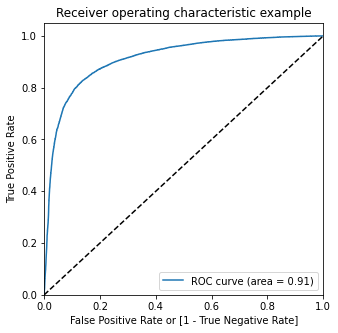

In [118]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding the Optimal cutoff point for the churn value

In [119]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.094557,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.063160,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.081252,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0.948372,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.734511,1,1,1,1,1,1,1,1,1,1,0,0


In [120]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500885  1.000000  0.000000
0.1   0.1  0.703255  0.974680  0.430867
0.2   0.2  0.766927  0.948061  0.585151
0.3   0.3  0.805130  0.919154  0.690702
0.4   0.4  0.829271  0.888323  0.770009
0.5   0.5  0.841693  0.851045  0.832307
0.6   0.6  0.843516  0.806229  0.880935
0.7   0.7  0.832109  0.744255  0.920275
0.8   0.8  0.797682  0.643340  0.952572
0.9   0.9  0.681797  0.382500  0.982156


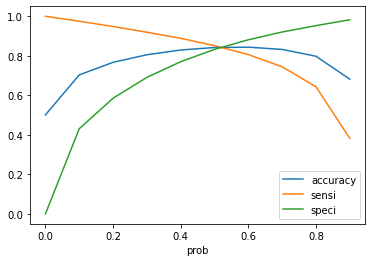

In [121]:
# Plottign the tradeoff graph between all the metrics
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Seems like our threshold of 0.5 is fine for sensitivity and specificity

### Precision & Recall calculations

In [122]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[15952,  3214],
       [ 2865, 16369]], dtype=int64)

#### Formula for Precision: TP/TP+FP

In [123]:
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
print("Precision: {}".format(precision))

Precision: 0.835878057498851


#### Formula for recall: TP/TP+FN

In [124]:
recall_log = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print("Recall: {}".format(recall_log))

Recall: 0.8510450244358948


#### F score calculation

- (2 × precision × recall)/(precision + recall)

In [125]:
f_score = (2*precision*recall_log)/(precision+recall_log)
print("F Score: {}".format(f_score))

F Score: 0.8433933585800036


#### Precision & Recall tradeoff graph plottin

In [126]:
from sklearn.metrics import precision_recall_curve

In [127]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

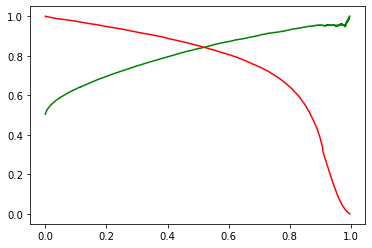

In [128]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- Looks like all our metrics i.e sensitivity, specificity, precision & recall performs good at 0.5 threshold

#### Accuracy and Recall printed below

In [129]:
accuracy = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted) 
print("Accuracy: {}".format(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))

Accuracy: 0.8416927083333333


In [130]:
recall = confusion[1,1]/(confusion[0,1]+confusion[1,1]) 
print("Recall: {}".format(confusion[1,1]/(confusion[0,1]+confusion[1,1])))

Recall: 0.835878057498851


In [131]:
performance.loc[4] = ['Logistic Regression Intrepretable', accuracy, recall]
performance

,Model,Accuracy,Recall
1,Logistic Regression,84.200000,85.170000
2,Decision Tree,83.000000,87.000000
3,Random Forest,84.000000,83.000000
4,Logistic Regression Intrepretable,0.841693,0.835878
